<a href="https://www.kaggle.com/code/subhajeetdas/heart-attack-prediction-using-stacking-ensemble?scriptVersionId=160550379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install dtreeviz -q      # '-q' used for quite installation

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Loading Data

In [3]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

# Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

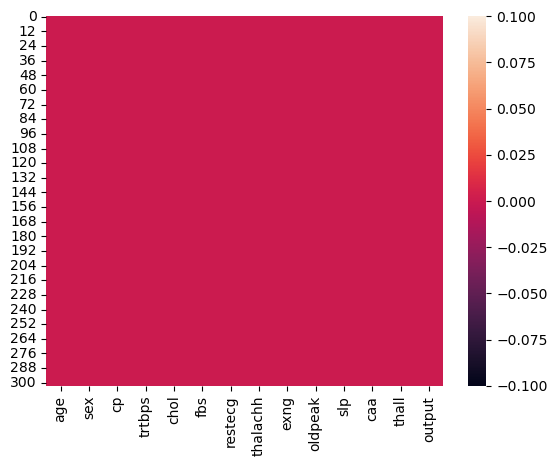

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
df.size

4242

In [10]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

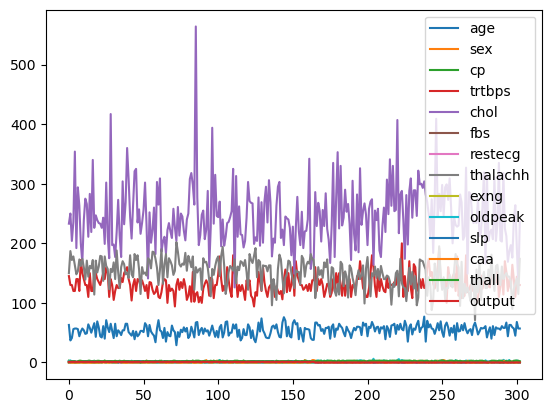

In [11]:
df.plot()

## Removing Outliers

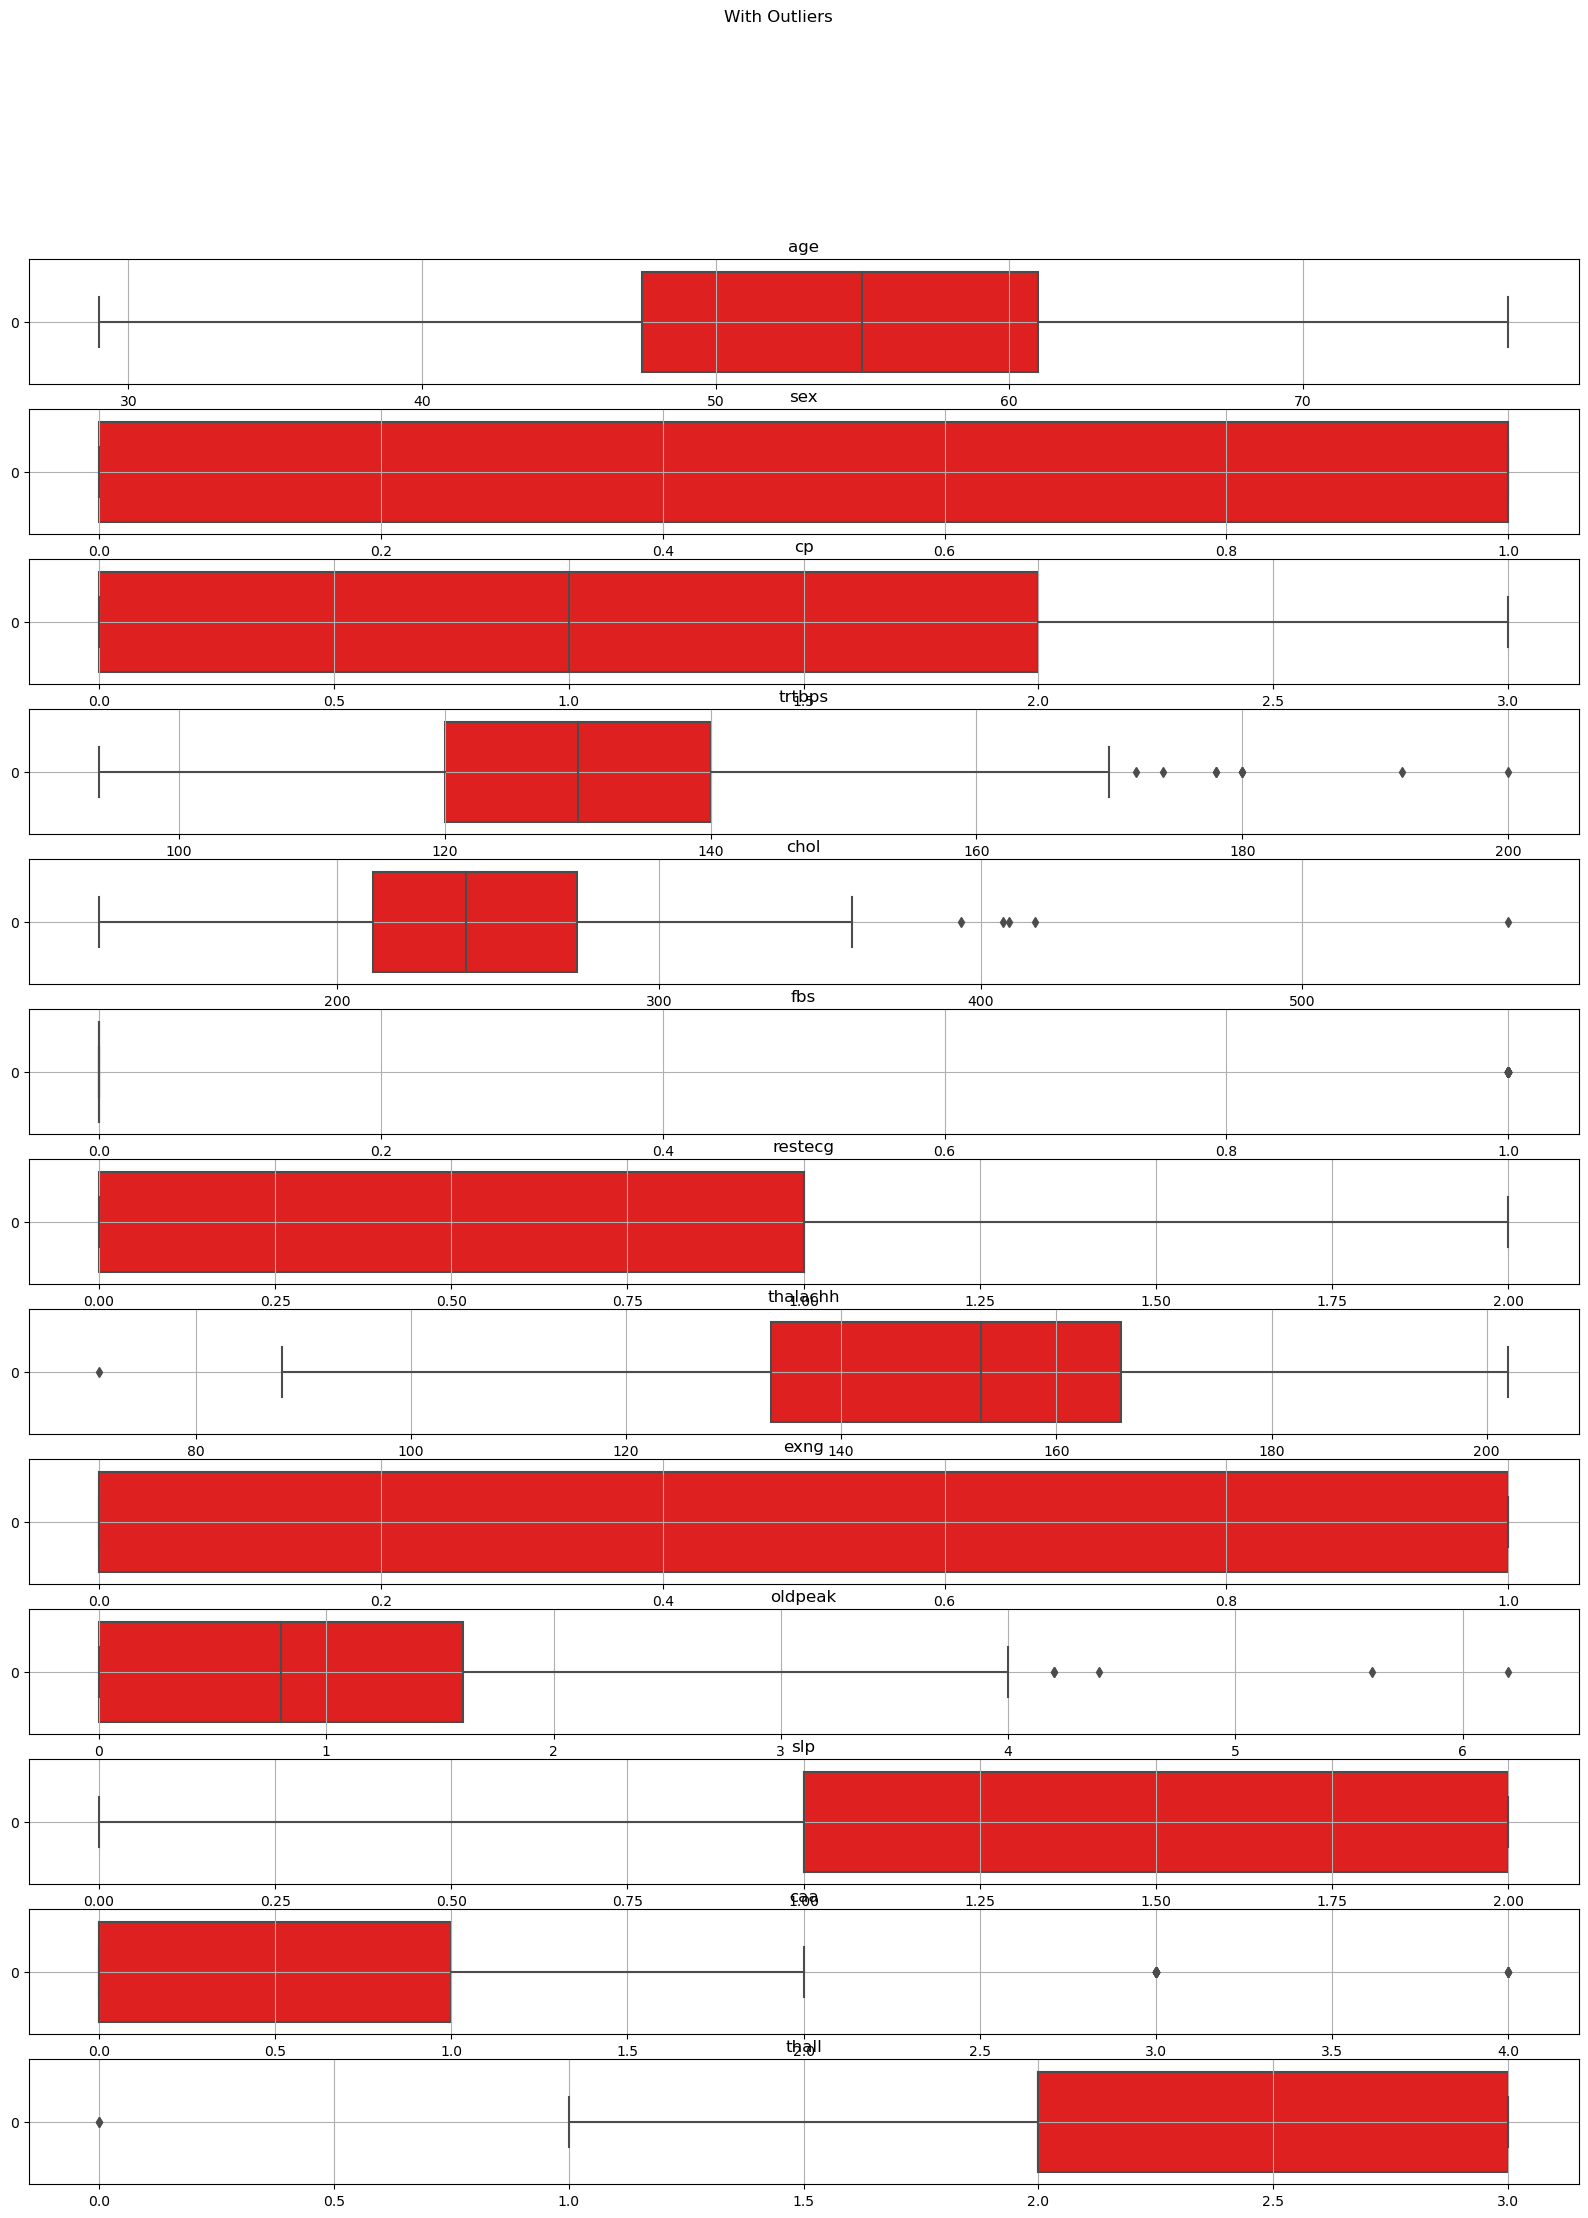

In [12]:
plt.figure(figsize = (20, 25))
plt.suptitle('With Outliers')

for i in range(len(df.columns)-1):
    plt.subplot(13, 1, i+1)
    plt.title(df.columns[i])
    sns.boxplot(df.iloc[:, i], orient = 'h', color = 'red')
    plt.grid()

In [13]:
z = np.abs(zscore(df))

# Identify outliers with a z-score greater than 3
threshold = 3
outliers = df[z > threshold]
print(outliers.notnull().sum())

df = df[(z < threshold).all(axis=1)]

age         0
sex         0
cp          0
trtbps      2
chol        4
fbs         0
restecg     0
thalachh    1
exng        0
oldpeak     2
slp         0
caa         5
thall       2
output      0
dtype: int64


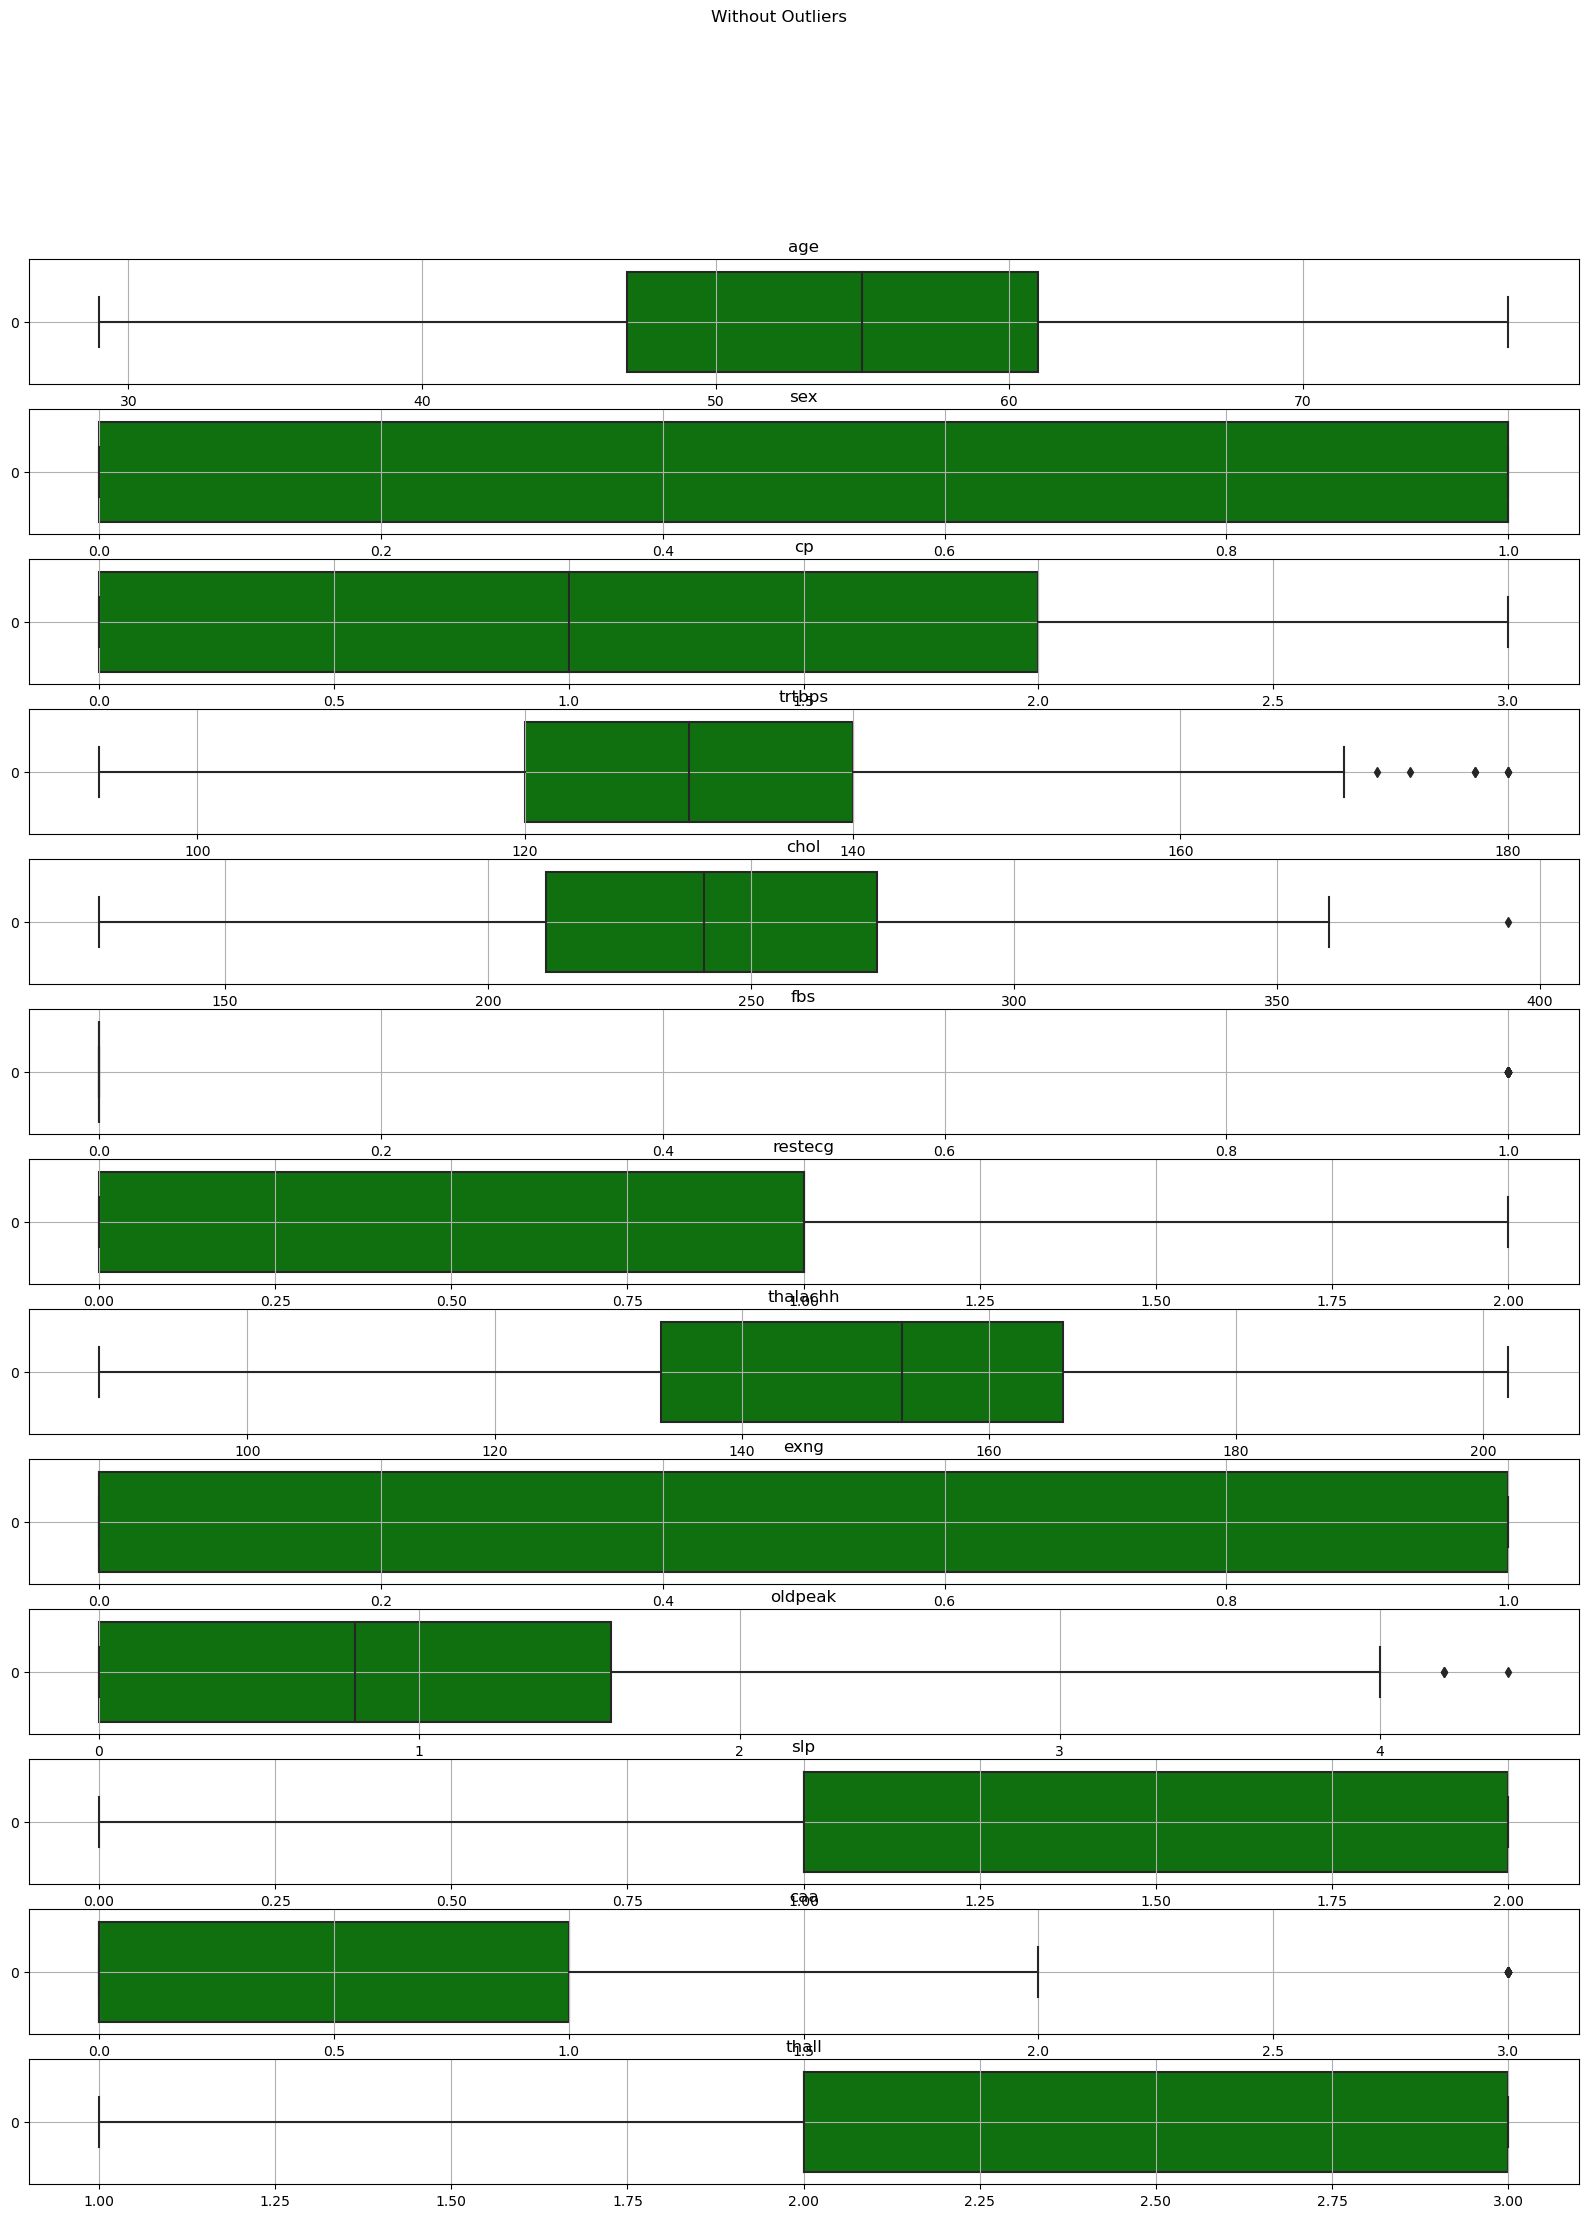

In [14]:
plt.figure(figsize = (20, 25))
plt.suptitle('Without Outliers')

for i in range(len(df.columns)-1):
    plt.subplot(13, 1, i+1)
    plt.title(df.columns[i])
    sns.boxplot(df.iloc[:, i], orient = 'h', color = 'green')
    plt.grid()

In [15]:
df.output.value_counts()

1    158
0    129
Name: output, dtype: int64

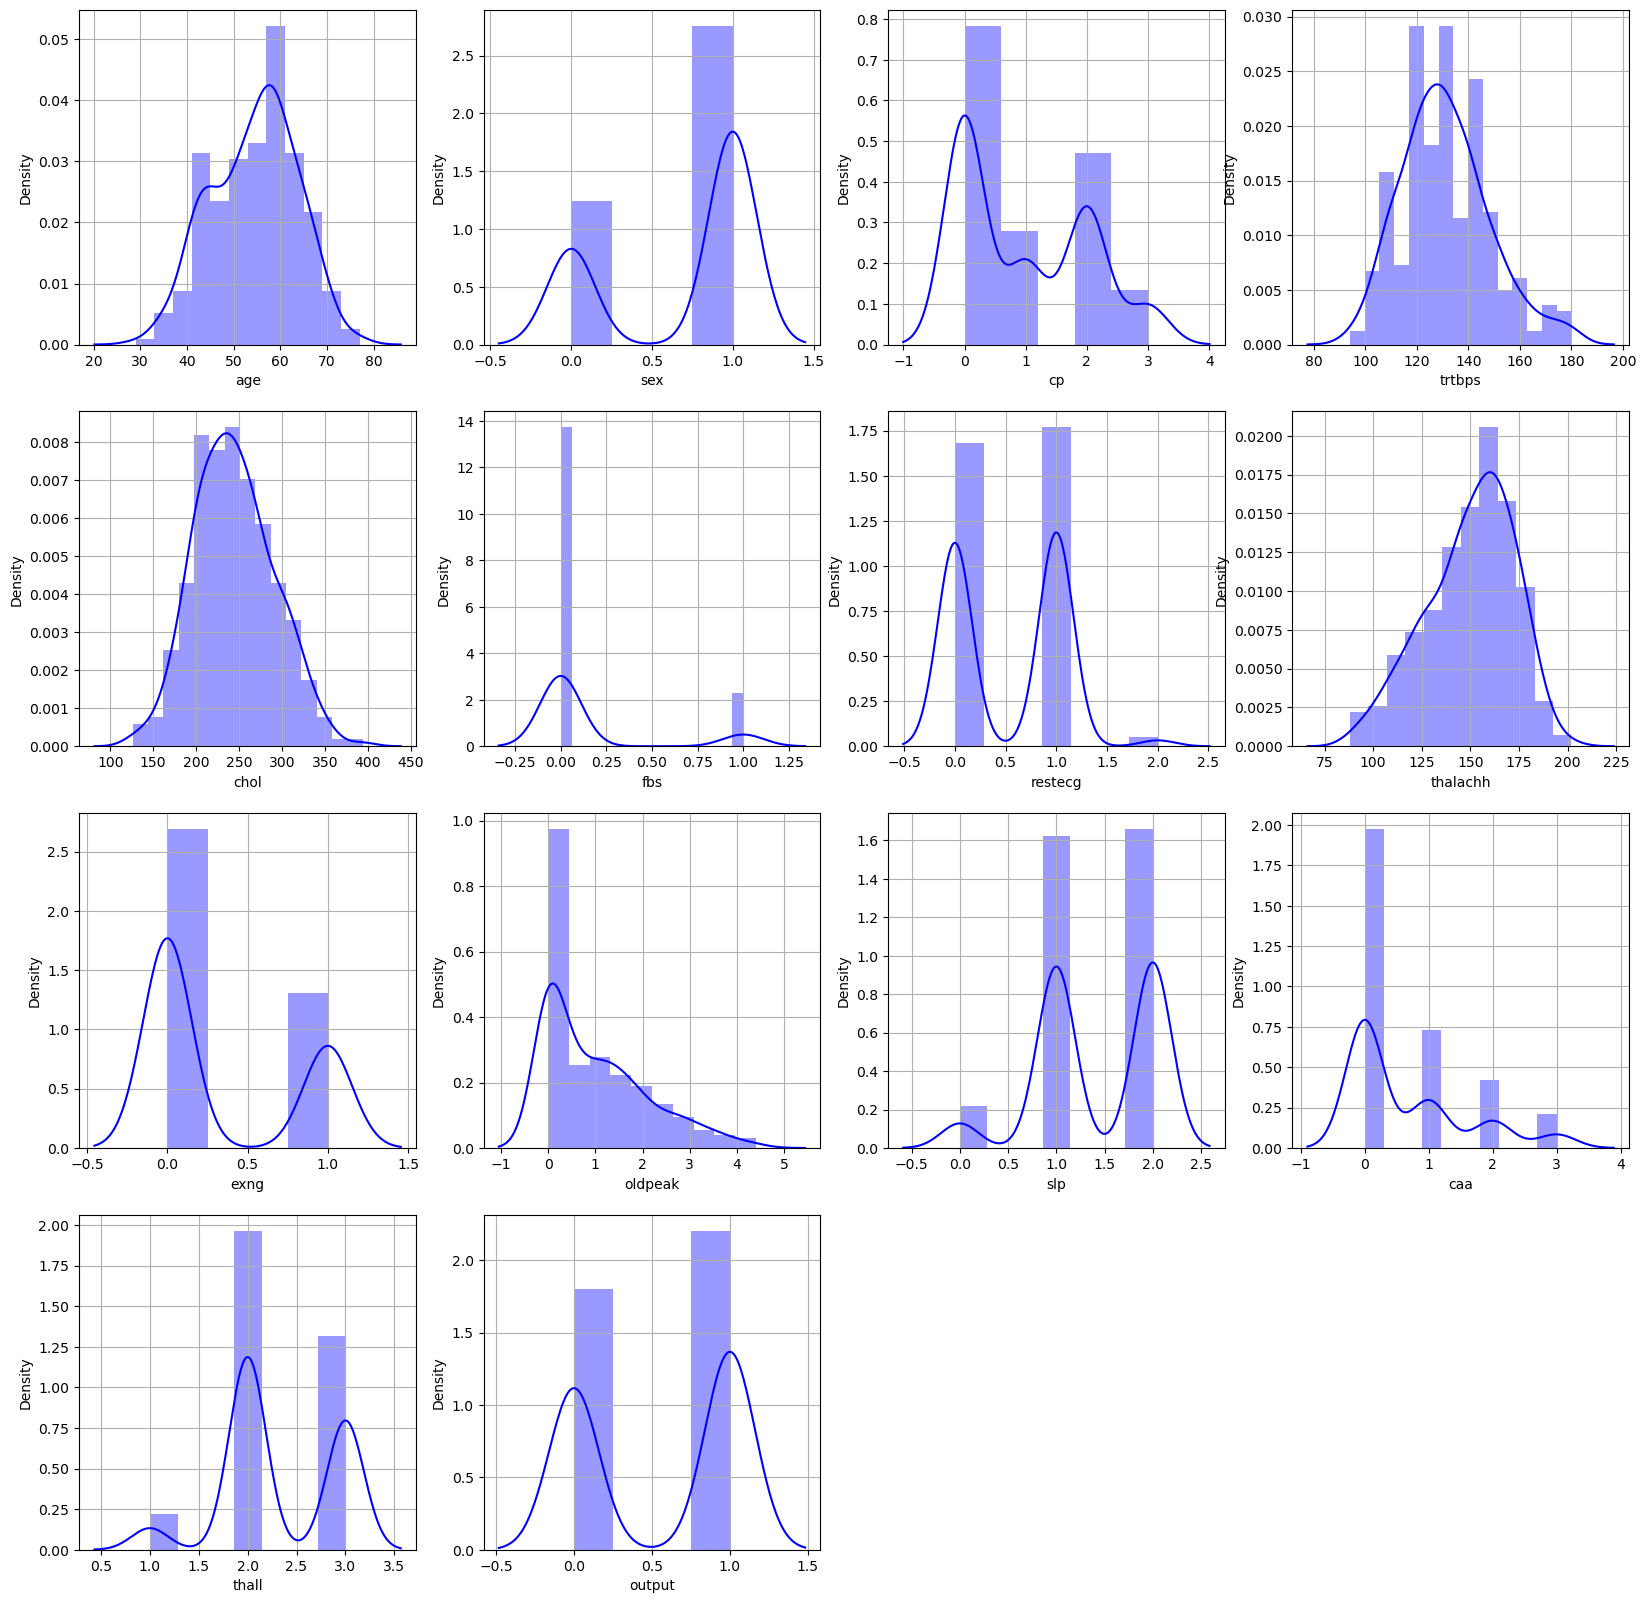

In [16]:
plt.figure(figsize = (20, 20))

for i in range(len(df.columns)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

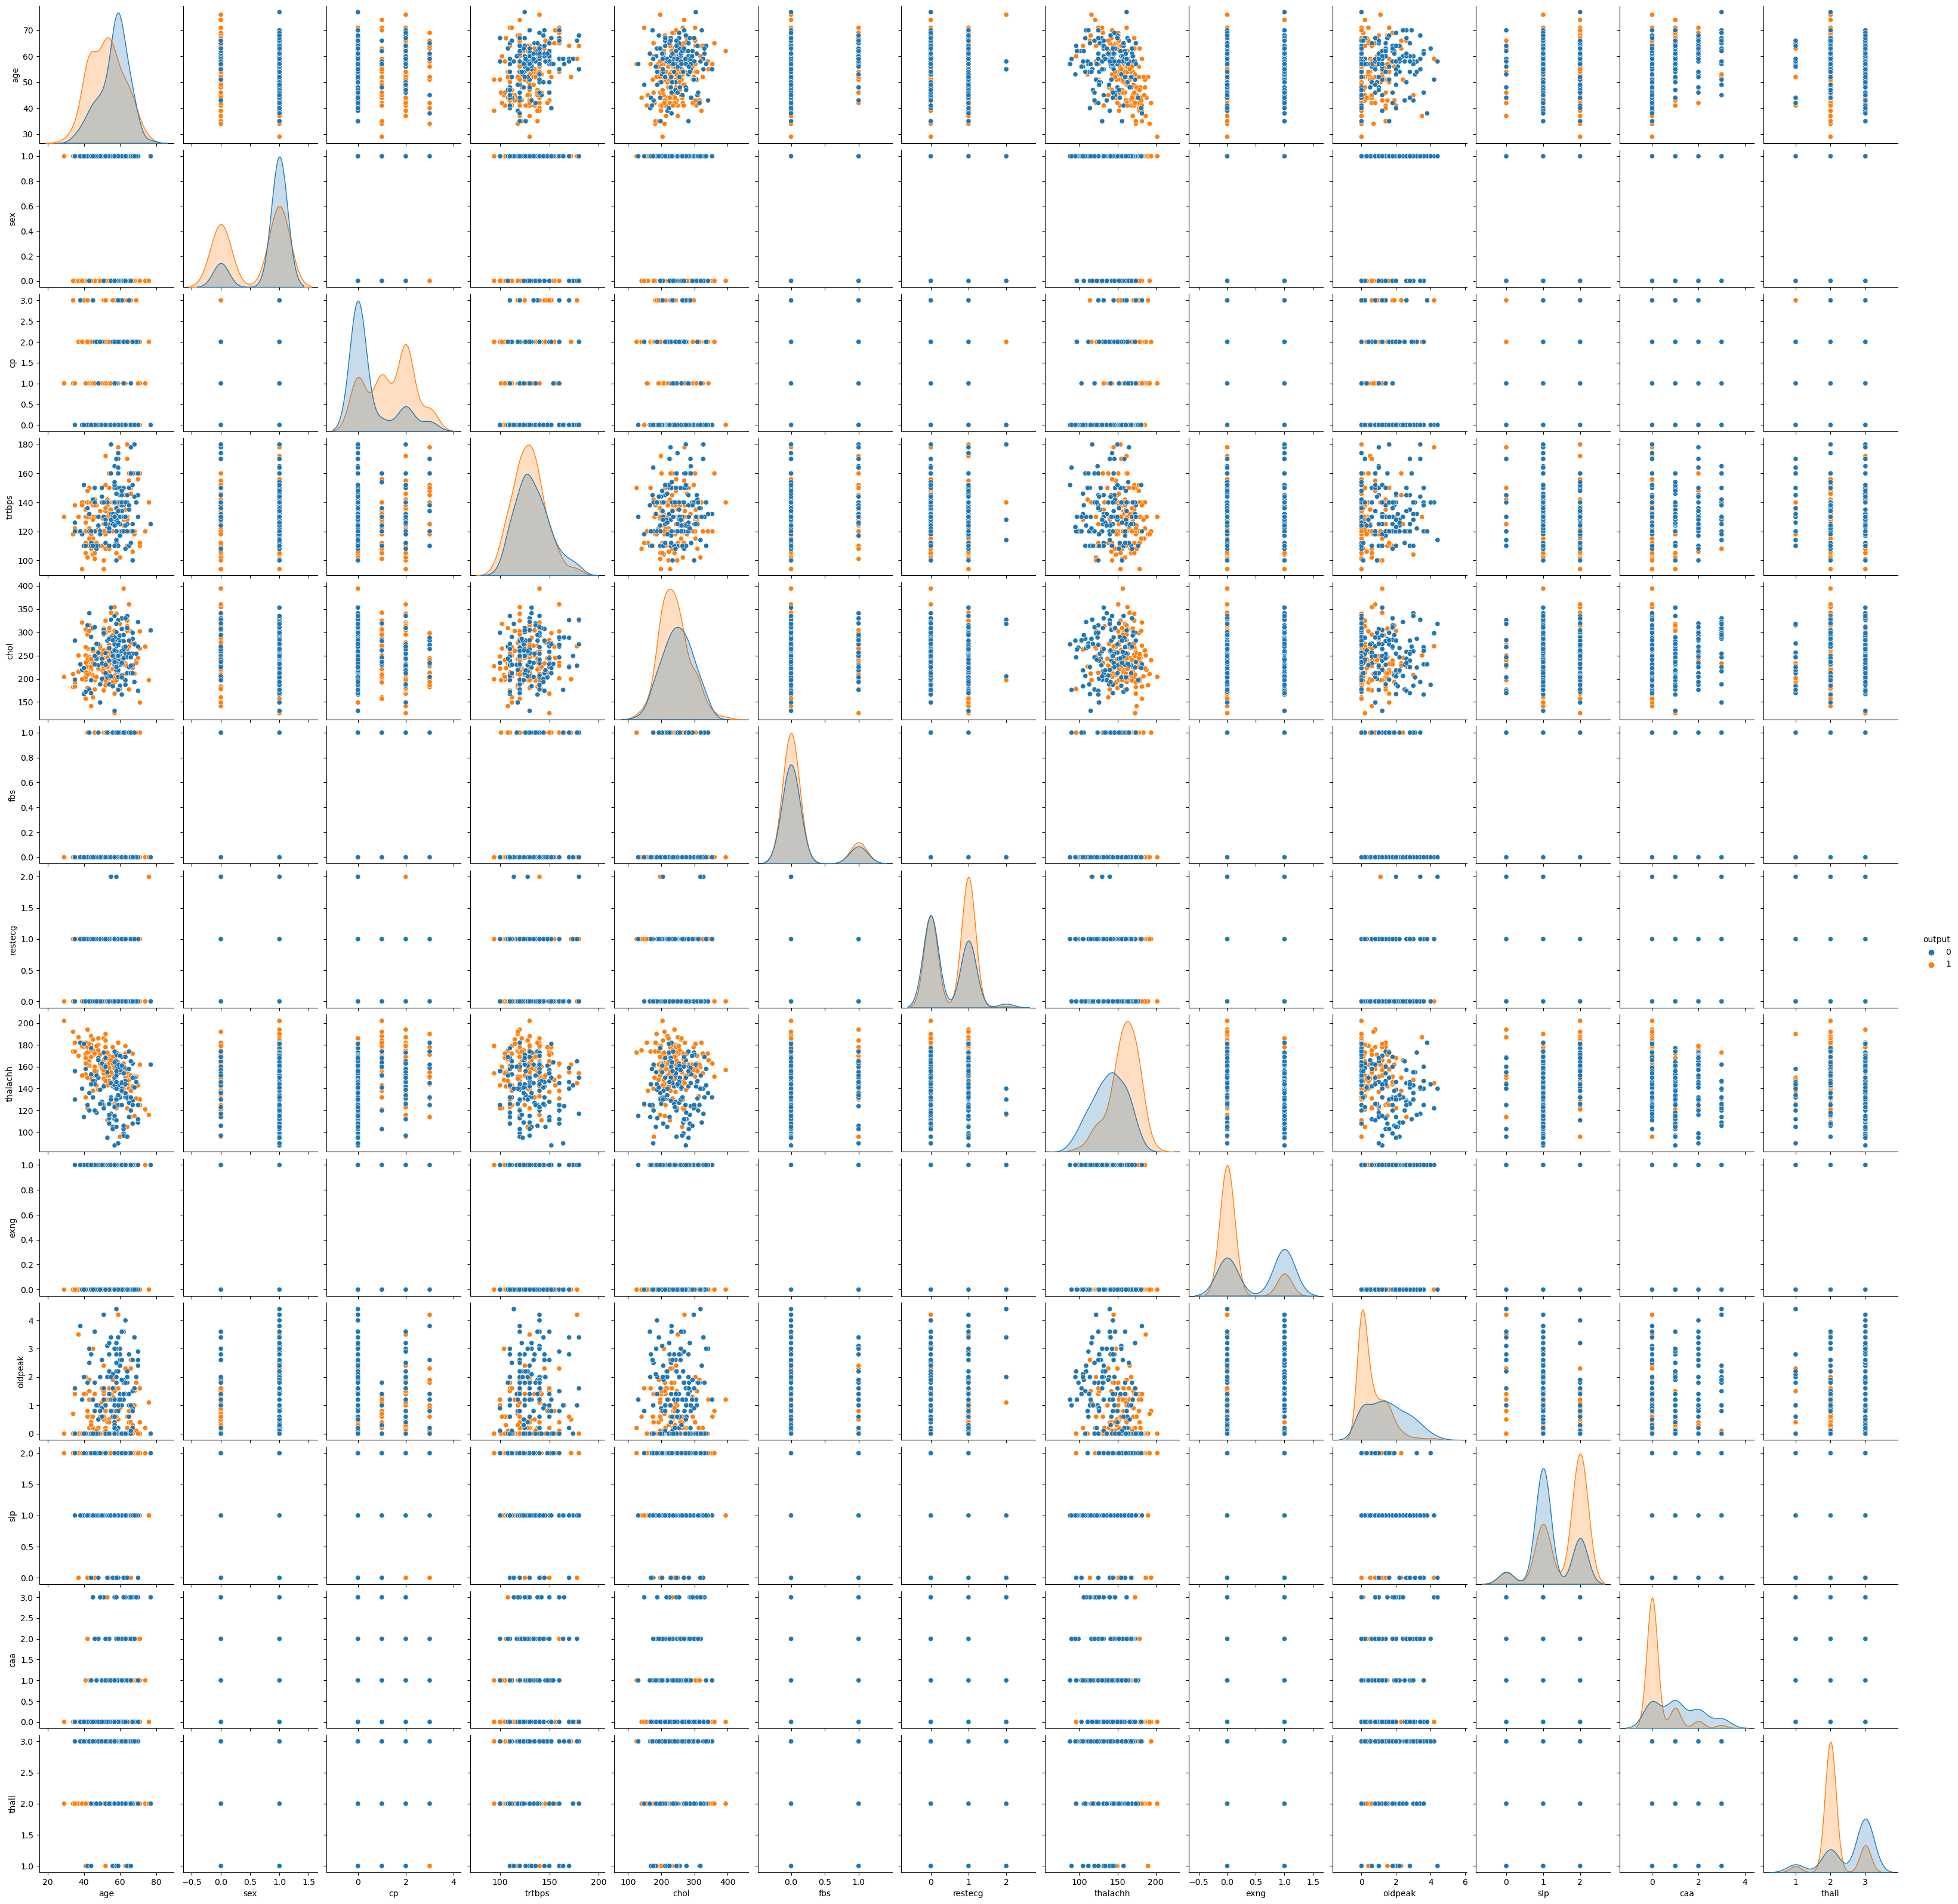

In [17]:
sns.pairplot(df, hue = 'output')

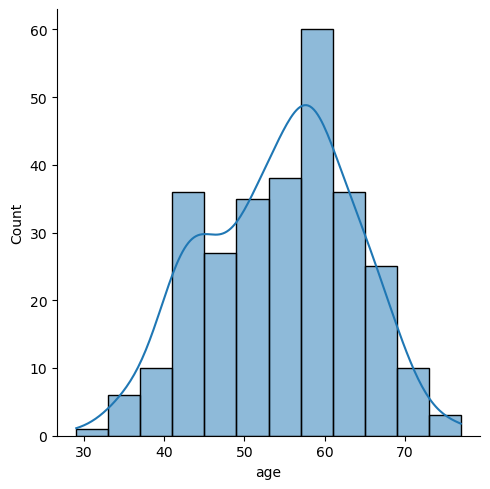

In [18]:
sns.displot(df['age'], kde=True)

<AxesSubplot:xlabel='output', ylabel='Density'>

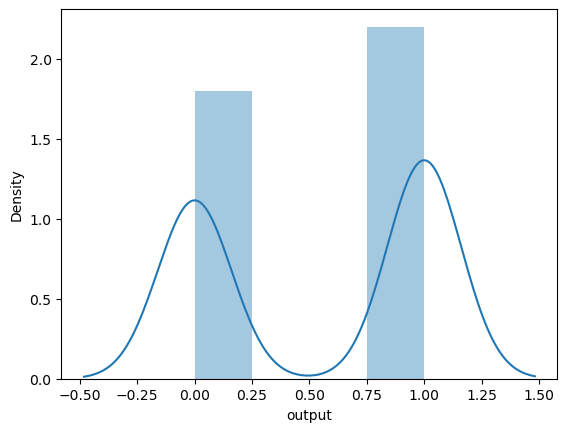

In [19]:
sns.distplot(df.output)

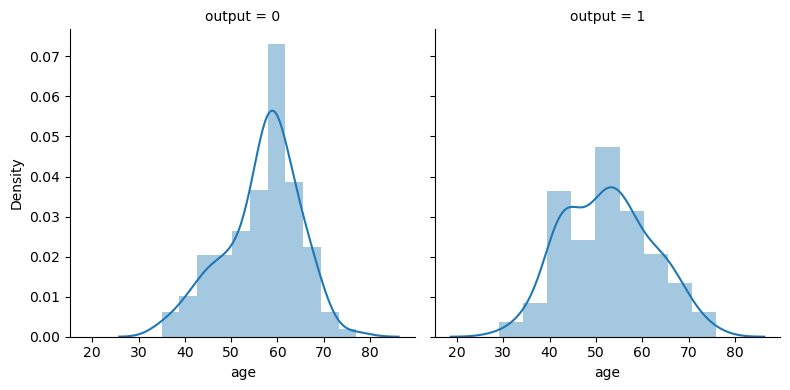

In [20]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "age")

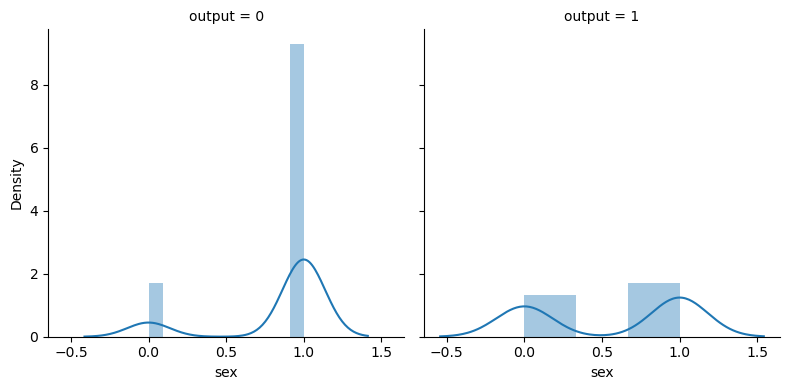

In [21]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "sex")

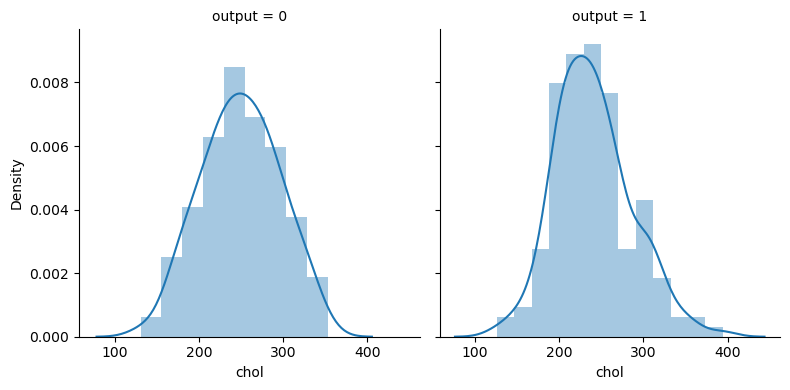

In [22]:
sea = sns.FacetGrid(df, col = "output", height = 4)
sea.map(sns.distplot, "chol")

In [23]:
X = df.iloc[:, :13]
X

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[287 rows x 13 columns]

In [24]:
x = X.values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [25]:
Y = df.iloc[:, -1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 287, dtype: int64

In [26]:
Y.value_counts()

1    158
0    129
Name: output, dtype: int64

In [27]:
y = Y.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

# Resampling using SMOTE

In [28]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(X, Y)

In [29]:
print(x_resampled.shape)

(316, 13)


In [30]:
print(y_resampled.value_counts())

1    158
0    158
Name: output, dtype: int64


# Train & Test Splitting the Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=1)

In [32]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'High'])
    cm.plot()

# Gaussian Naive Bayes

In [33]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
y_pred_gnb = model_gnb.predict(x_test)

Precision :  0.7419354838709677
Recall :  0.92
Accuracy :  0.84375
F1 Score :  0.8214285714285714

 [[31  8]
 [ 2 23]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.74      0.92      0.82        25

    accuracy                           0.84        64
   macro avg       0.84      0.86      0.84        64
weighted avg       0.86      0.84      0.85        64

******************************************************



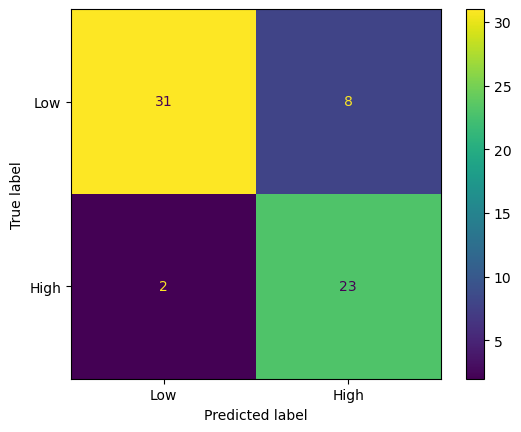

In [35]:
perform(y_pred_gnb)

## Save the Gaussian Naive Bayes model

In [36]:
filename = 'Heart_Attack_Prediction_GNB.h5'
pickle.dump(model_gnb, open(filename, 'wb'))

# Multinomial Naive Bayes

In [37]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [38]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  0.6551724137931034
Recall :  0.76
Accuracy :  0.75
F1 Score :  0.7037037037037037

 [[29 10]
 [ 6 19]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        39
           1       0.66      0.76      0.70        25

    accuracy                           0.75        64
   macro avg       0.74      0.75      0.74        64
weighted avg       0.76      0.75      0.75        64

******************************************************



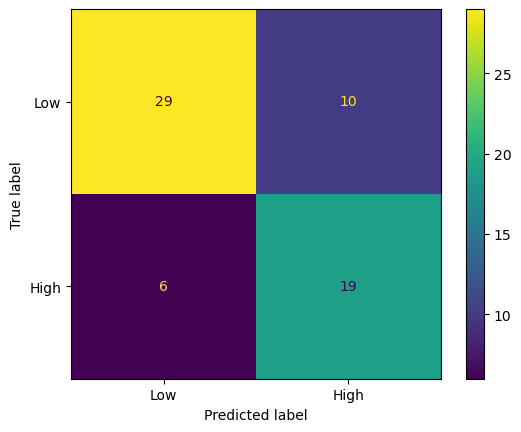

In [39]:
perform(y_pred_mnb)

## Save the Multinomial Naive Bayes model

In [40]:
filename = 'Heart_Attack_Prediction_MNB.h5'
pickle.dump(model_mnb, open(filename, 'wb'))

# Bernoulli Naive Bayes

In [41]:
model_bnb = BernoulliNB()
model_bnb.fit(x_train, y_train)

BernoulliNB()

In [42]:
y_pred_bnb = model_bnb.predict(x_test)

Precision :  0.75
Recall :  0.84
Accuracy :  0.828125
F1 Score :  0.7924528301886793

 [[32  7]
 [ 4 21]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.75      0.84      0.79        25

    accuracy                           0.83        64
   macro avg       0.82      0.83      0.82        64
weighted avg       0.83      0.83      0.83        64

******************************************************



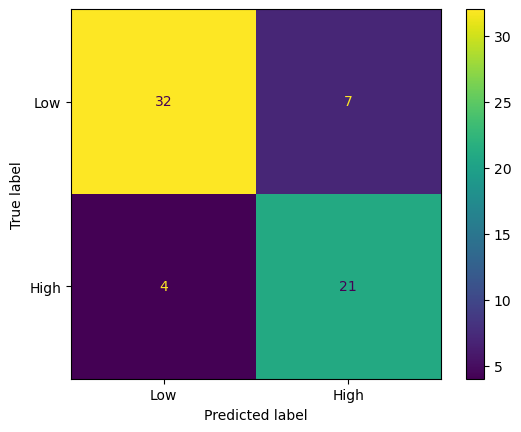

In [43]:
perform(y_pred_bnb)

## Save the Bernoulli Naive Bayes model

In [44]:
filename = 'Heart_Attack_Prediction_BNB.h5'
pickle.dump(model_bnb, open(filename, 'wb'))

# Logistic Regreasion

In [45]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.7058823529411765
Recall :  0.96
Accuracy :  0.828125
F1 Score :  0.8135593220338982

 [[29 10]
 [ 1 24]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        39
           1       0.71      0.96      0.81        25

    accuracy                           0.83        64
   macro avg       0.84      0.85      0.83        64
weighted avg       0.86      0.83      0.83        64

******************************************************



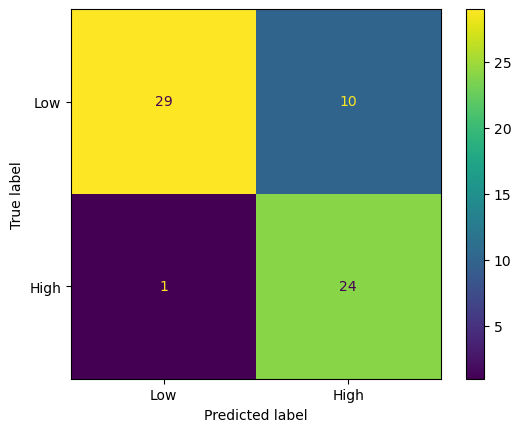

In [47]:
perform(y_pred_lr)

## Save the Logistic Regression model

In [48]:
filename = 'Heart_Attack_Prediction_LR.h5'
pickle.dump(model_lr, open(filename, 'wb'))

# XGBoost Classifier

In [49]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  0.7777777777777778
Recall :  0.84
Accuracy :  0.84375
F1 Score :  0.8076923076923077

 [[33  6]
 [ 4 21]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        39
           1       0.78      0.84      0.81        25

    accuracy                           0.84        64
   macro avg       0.83      0.84      0.84        64
weighted avg       0.85      0.84      0.84        64

******************************************************



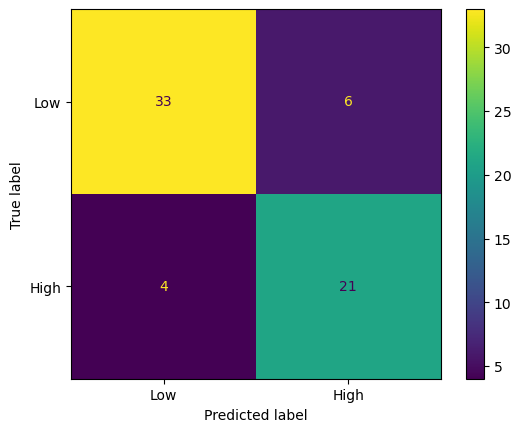

In [51]:
perform(y_pred_xgb)

## Save the XGBoost Classifier model

In [52]:
filename = 'Heart_Attack_Prediction_XGB.h5'
pickle.dump(model_xgb, open(filename, 'wb'))

# Decision Tree

In [53]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.6896551724137931
Recall :  0.8
Accuracy :  0.78125
F1 Score :  0.7407407407407408

 [[30  9]
 [ 5 20]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.69      0.80      0.74        25

    accuracy                           0.78        64
   macro avg       0.77      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64

******************************************************



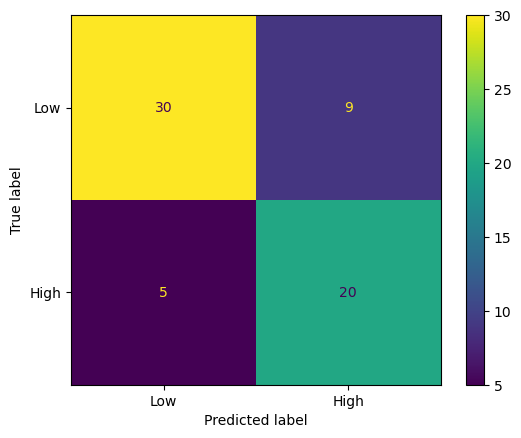

In [55]:
perform(y_pred_dt)

## Save the Decision Tree model

In [56]:
filename = 'Heart_Attack_Prediction_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))

## Decision Tree Visualization

In [57]:
feature_names = df.columns[0:13]
viz = df.copy()
viz["output"]=viz["output"].values.astype(str)
print(viz.dtypes)
target_names = viz['output'].unique().tolist()

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output       object
dtype: object


In [58]:
target_names

['1', '0']

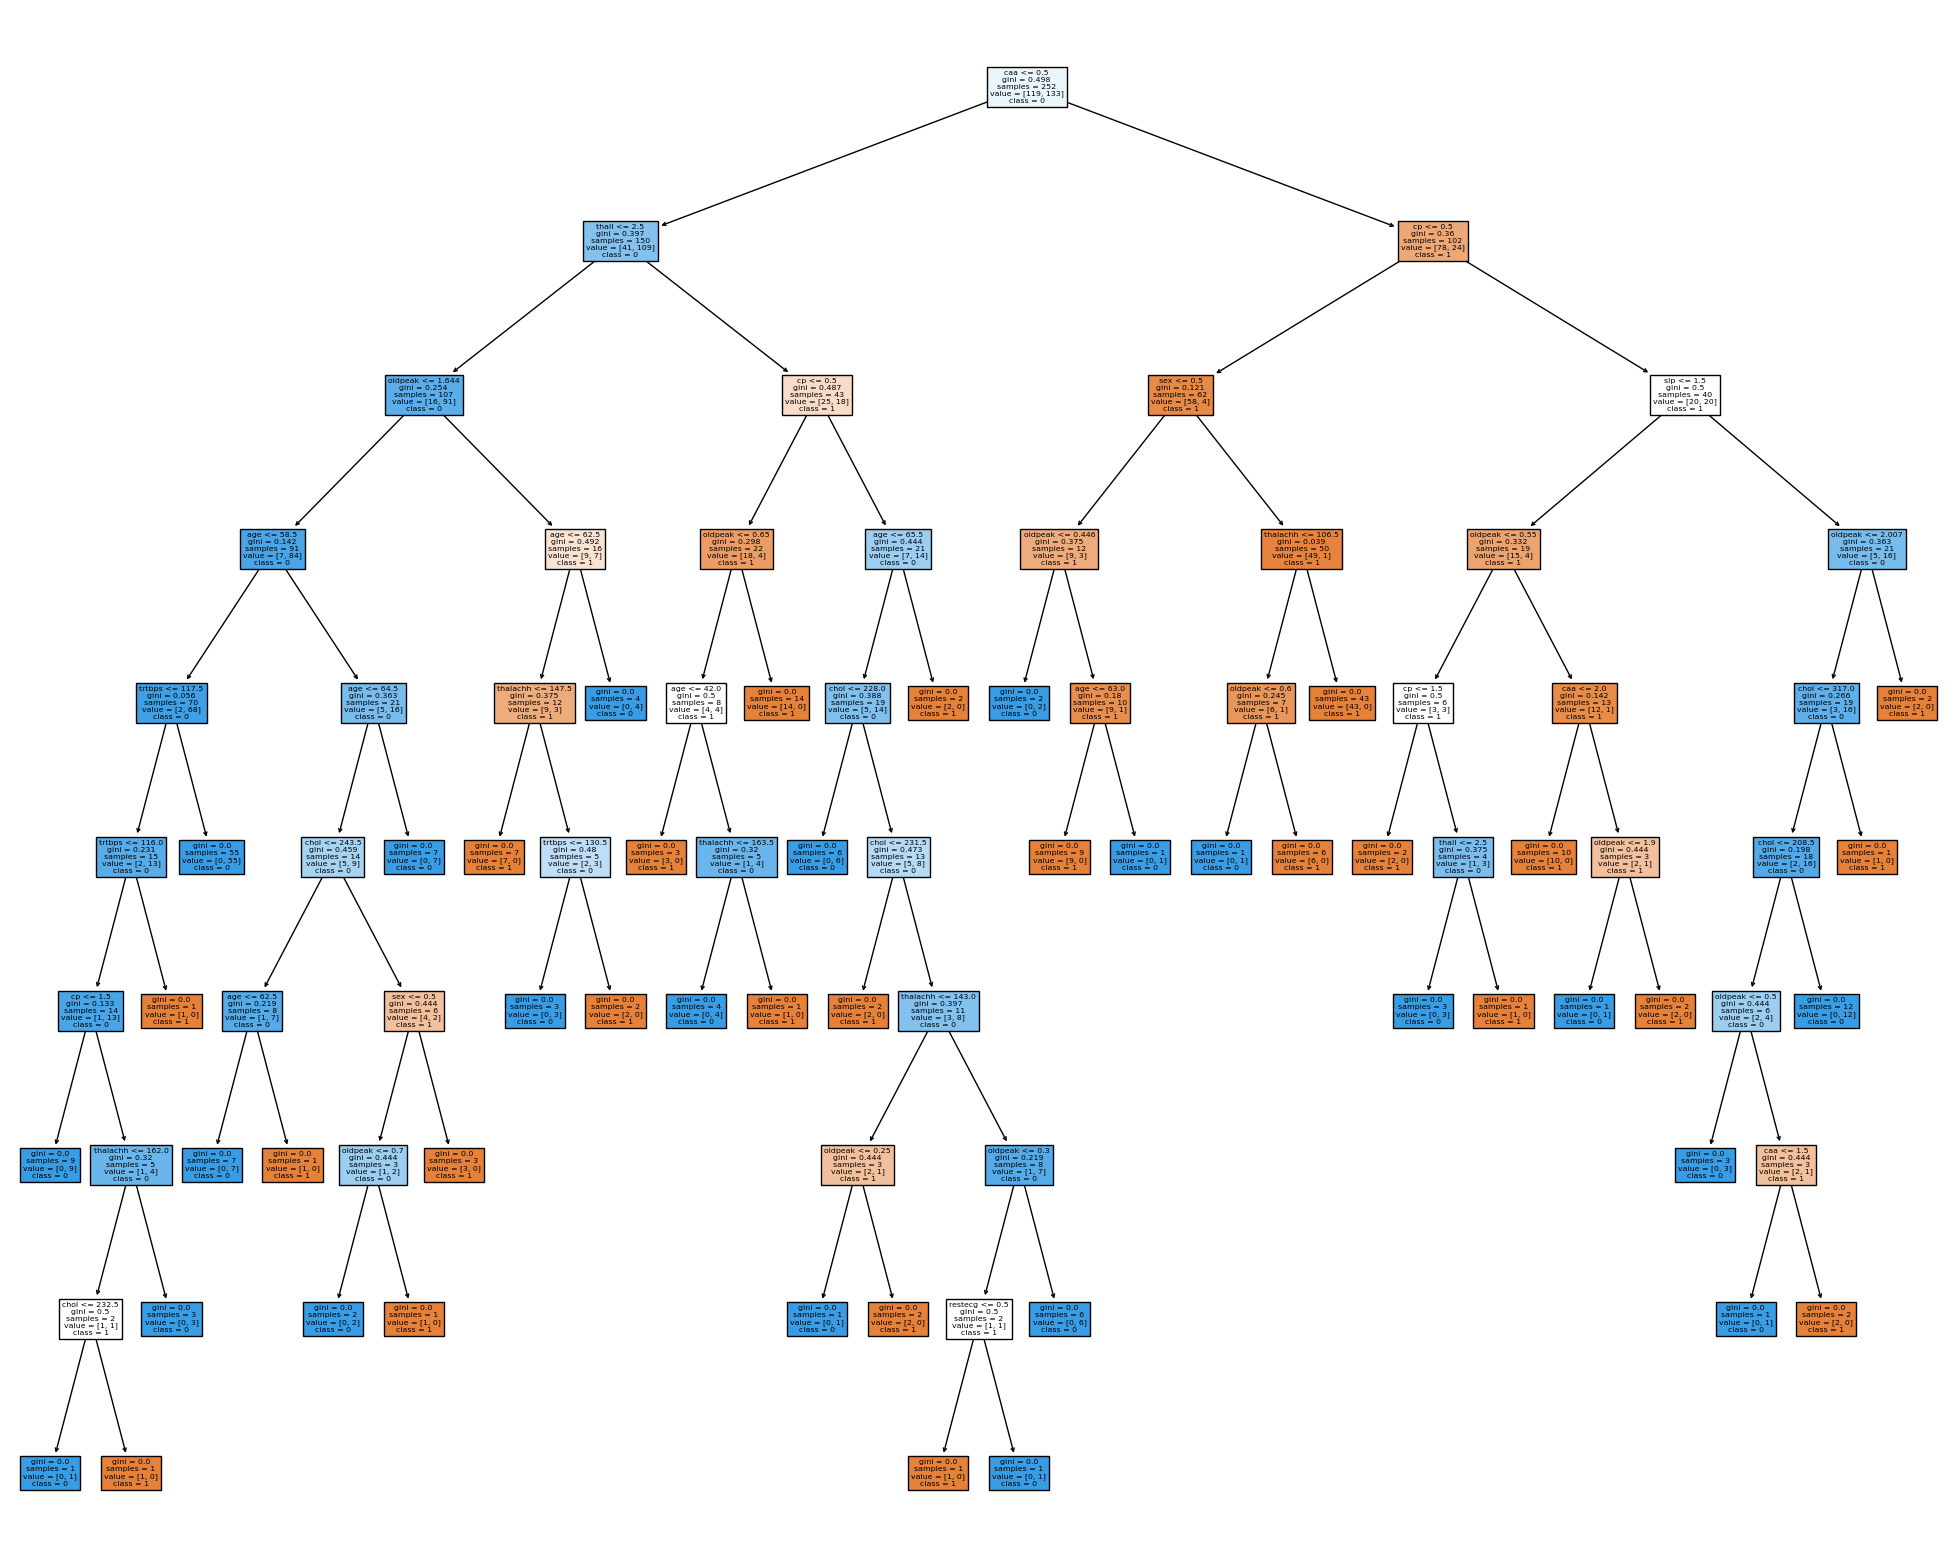

In [59]:
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

In [60]:
viz_model = dtreeviz.model(model_dt,
                           X_train=x_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Heart Attack Chances',
                           class_names=['High', 'Low'])

v = viz_model.view()     # render as SVG into internal object
v.save("Heart Attack Chances.svg")  # save as svg

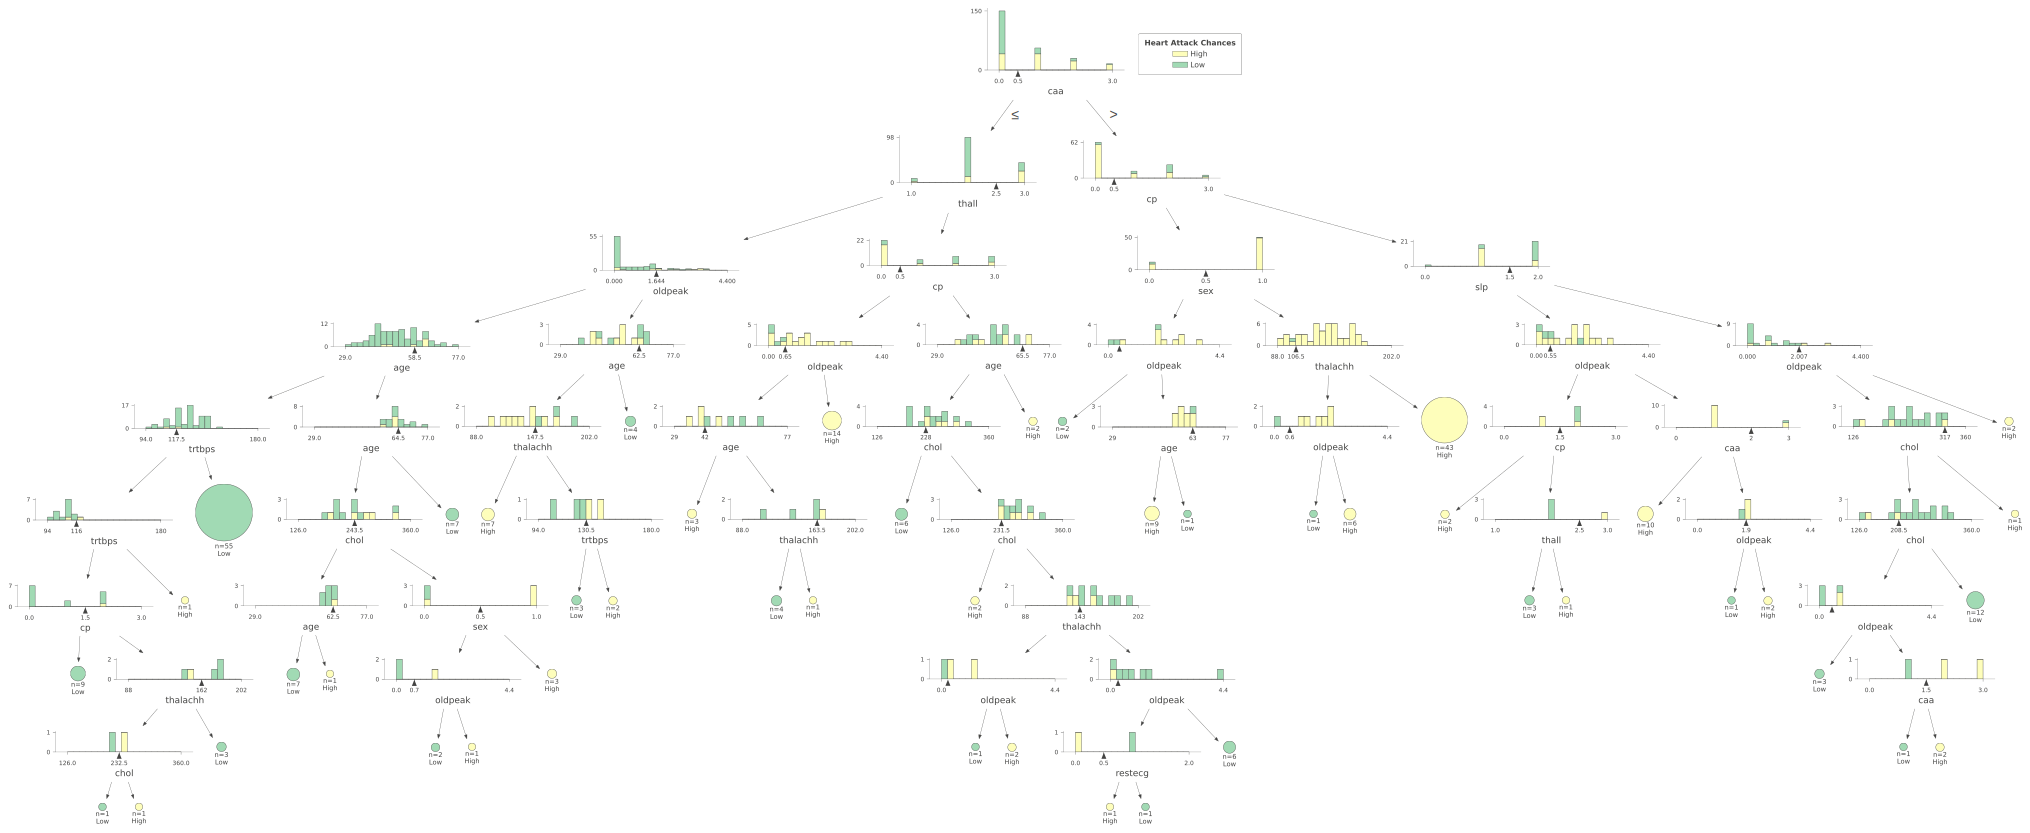

In [61]:
viz_model.view()

# Random Forest

In [62]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.8214285714285714
Recall :  0.92
Accuracy :  0.890625
F1 Score :  0.8679245283018867

 [[34  5]
 [ 2 23]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.82      0.92      0.87        25

    accuracy                           0.89        64
   macro avg       0.88      0.90      0.89        64
weighted avg       0.90      0.89      0.89        64

******************************************************



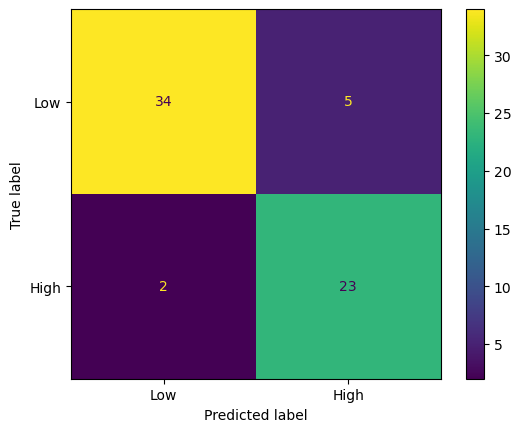

In [64]:
perform(y_pred_rf)

## Save the Random Forest model

In [65]:
filename = 'Heart_Attack_Prediction_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))

# K-Nearest Neighbors

In [66]:
iteration = 25

In [67]:
error_rate = []
acc = []
scores = {}

for i in range(1,iteration):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
    scores[i] = accuracy_score(y_test, y_pred_knn)
    acc.append(accuracy_score(y_test, y_pred_knn))

scores

{1: 0.640625,
 2: 0.640625,
 3: 0.640625,
 4: 0.703125,
 5: 0.640625,
 6: 0.65625,
 7: 0.65625,
 8: 0.703125,
 9: 0.671875,
 10: 0.71875,
 11: 0.65625,
 12: 0.671875,
 13: 0.65625,
 14: 0.65625,
 15: 0.640625,
 16: 0.6875,
 17: 0.640625,
 18: 0.640625,
 19: 0.671875,
 20: 0.65625,
 21: 0.65625,
 22: 0.65625,
 23: 0.65625,
 24: 0.640625}

Minimum error:- 0.28125 at K = 9


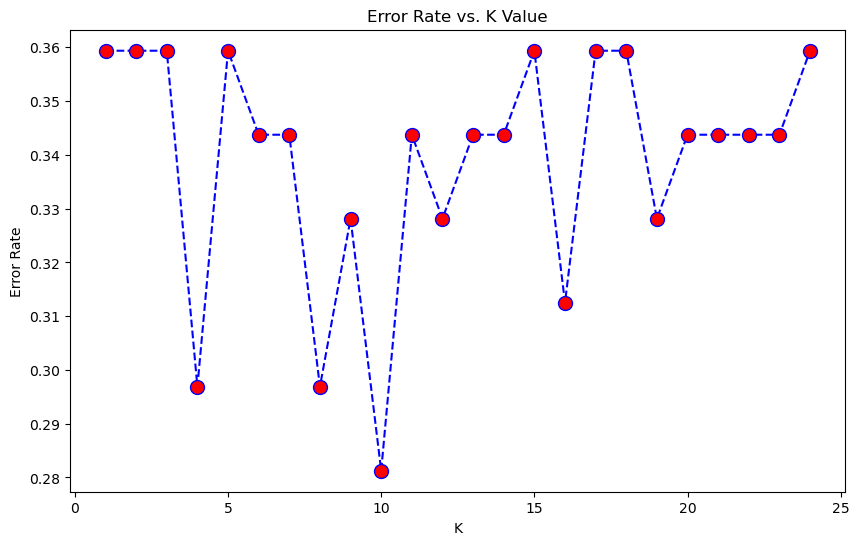

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.71875 at K = 9


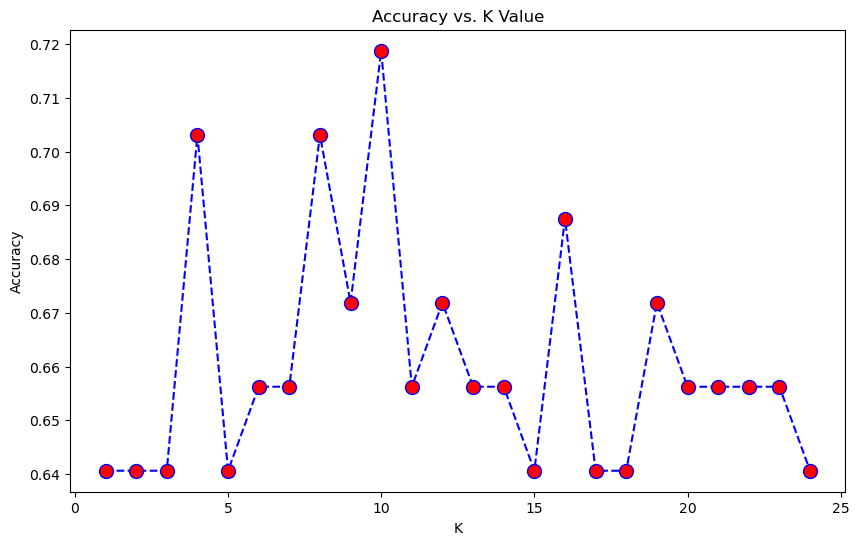

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration),acc,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [70]:
model_knn = KNeighborsClassifier(n_neighbors = 23)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [71]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.5517241379310345
Recall :  0.64
Accuracy :  0.65625
F1 Score :  0.5925925925925927

 [[26 13]
 [ 9 16]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        39
           1       0.55      0.64      0.59        25

    accuracy                           0.66        64
   macro avg       0.65      0.65      0.65        64
weighted avg       0.67      0.66      0.66        64

******************************************************



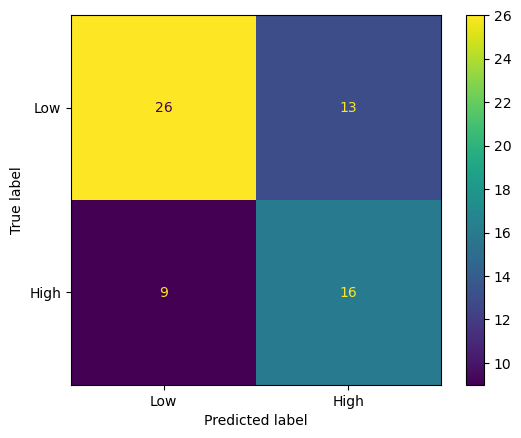

In [72]:
perform(y_pred_knn)

## Save the KNN model

In [73]:
filename = 'Heart_Attack_Prediction_KNN.h5'
pickle.dump(model_knn, open(filename, 'wb'))

# Support Vector Classifier with Linear Kernel

In [74]:
model_svc = SVC(kernel='linear')
model_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [75]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.6571428571428571
Recall :  0.92
Accuracy :  0.78125
F1 Score :  0.7666666666666667

 [[27 12]
 [ 2 23]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.69      0.79        39
           1       0.66      0.92      0.77        25

    accuracy                           0.78        64
   macro avg       0.79      0.81      0.78        64
weighted avg       0.82      0.78      0.78        64

******************************************************



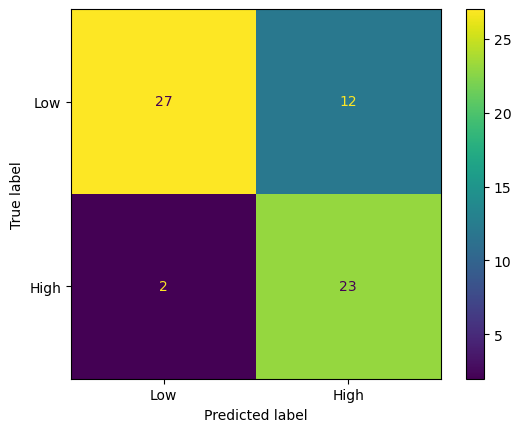

In [76]:
perform(y_pred_svc)

## Save the SVC model

In [77]:
filename = 'Heart_Attack_Prediction_SVC.h5'
pickle.dump(model_svc, open(filename, 'wb'))

# Nu-Support Vector Classifier

In [78]:
model_nsvc = NuSVC()
model_nsvc.fit(x_train, y_train)

NuSVC()

In [79]:
y_pred_nsvc = model_nsvc.predict(x_test)

Precision :  0.6666666666666666
Recall :  0.96
Accuracy :  0.796875
F1 Score :  0.7868852459016393

 [[27 12]
 [ 1 24]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      0.69      0.81        39
           1       0.67      0.96      0.79        25

    accuracy                           0.80        64
   macro avg       0.82      0.83      0.80        64
weighted avg       0.85      0.80      0.80        64

******************************************************



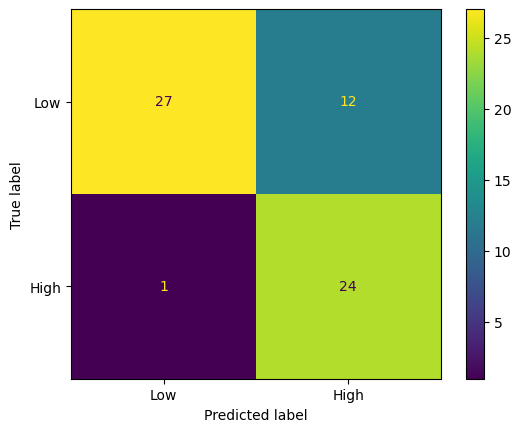

In [80]:
perform(y_pred_nsvc)

## Save the NuSVC model

In [81]:
filename = 'Heart_Attack_Prediction_NuSVC.h5'
pickle.dump(model_nsvc, open(filename, 'wb'))

# Multi-Layer Perceptron

In [82]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [83]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.84
Recall :  0.84
Accuracy :  0.875
F1 Score :  0.8399999999999999

 [[35  4]
 [ 4 21]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.84      0.84      0.84        25

    accuracy                           0.88        64
   macro avg       0.87      0.87      0.87        64
weighted avg       0.88      0.88      0.88        64

******************************************************



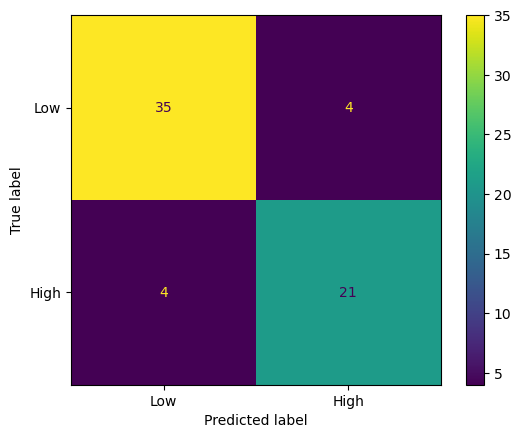

In [84]:
perform(y_pred_mlp)

## Save the MLP model

In [85]:
filename = 'Heart_Attack_Prediction_MLP.h5'
try:
    pickle.dump(model_mlp, open(filename, 'wb'))
    print(f"{'Model Saved':-^40}")
except:
    print("!!! Model not saved !!!")

--------------Model Saved---------------


# Stacking Ensemble using Stacking Classifier

In [86]:
final = RandomForestClassifier()
classifiers = [('Logistic Regression', model_lr), ('Decision Tree', model_dt), ('MLP', model_mlp), ('Gaussian NB', model_gnb), ('Mutinomial NB', model_mnb), ('Bernoulli NB', model_bnb), ('XGBoost', model_xgb), ('Random Forest', model_rf), ('NuSVC', model_nsvc), ('KNN', model_knn), ('SVC', model_svc)]
model_st = StackingClassifier(classifiers, final_estimator=final)
model_st.fit(x_train, y_train)

StackingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('MLP', MLPClassifier()),
                               ('Gaussian NB', GaussianNB()),
                               ('Mutinomial NB', MultinomialNB()),
                               ('Bernoulli NB', BernoulliNB()),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsamp...
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
         

In [87]:
y_pred_stack = model_st.predict(x_test)

Precision :  0.7272727272727273
Recall :  0.96
Accuracy :  0.84375
F1 Score :  0.8275862068965517

 [[30  9]
 [ 1 24]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        39
           1       0.73      0.96      0.83        25

    accuracy                           0.84        64
   macro avg       0.85      0.86      0.84        64
weighted avg       0.87      0.84      0.85        64

******************************************************



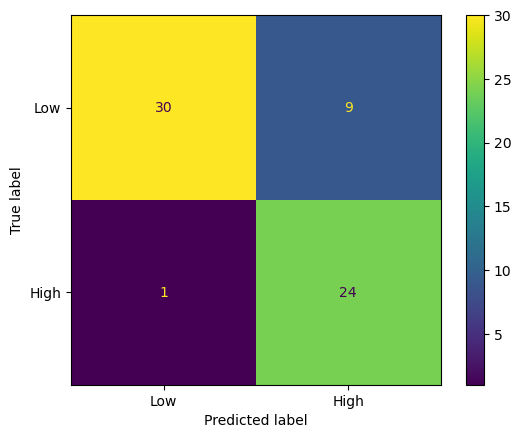

In [88]:
perform(y_pred_stack)

# Cross validating the Stacking Ensemble Model

In [89]:
score = []
score = cross_val_score(model_st, X=x_train, y=y_train, scoring='accuracy', cv = 10)
print(f'Accuracy = {score.mean()}')

Accuracy = 0.8535384615384615


# Cross validating all the other models

In [90]:
model = [model_bnb, model_gnb, model_mnb, model_lr, model_xgb, model_dt, model_rf, model_knn, model_svc, model_nsvc, model_mlp]
mod = []
aucc = []

for i in model:
    mod.append(i)
    print(f"{'':-^60}")
    result = cross_val_score(i, X=x_train, y=y_train, scoring='accuracy', cv = 10)
    aucc.append(result.mean())
    print(f'for Model = {i}, Accuracy = {result.mean()}')

------------------------------------------------------------
for Model = BernoulliNB(), Accuracy = 0.8140000000000001
------------------------------------------------------------
for Model = GaussianNB(), Accuracy = 0.8218461538461538
------------------------------------------------------------
for Model = MultinomialNB(), Accuracy = 0.7269230769230768
------------------------------------------------------------
for Model = LogisticRegression(), Accuracy = 0.8775384615384615
------------------------------------------------------------
for Model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_

In [91]:
view = pd.DataFrame({'model' : mod, 'Accuracy' : aucc})
view.style.highlight_max(subset = ["Accuracy"])

# Precision-Recall Curve

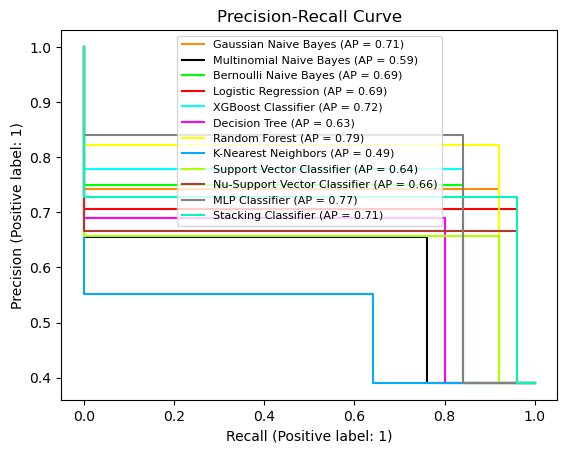

In [92]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, ax=ax, name=f"Gaussian Naive Bayes", color="darkorange")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost Classifier", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="magenta", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="yellow", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, name=f"K-Nearest Neighbors", color="#05AAFC", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name=f"Support Vector Classifier", color="#AEFE01", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nsvc, name=f"Nu-Support Vector Classifier", color="#B03A2E", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, name=f"MLP Classifier", color="gray", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_stack, name=f"Stacking Classifier", color="#07f5bd", ax=ax)
plt.legend(loc="best", fontsize="8")

# ROC Curve

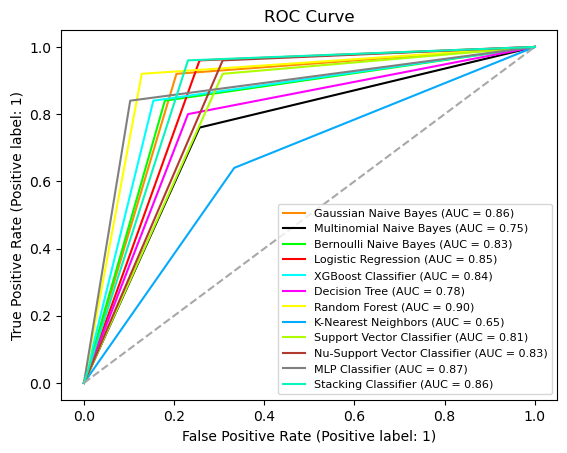

In [93]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, ax=ax, name=f"Gaussian Naive Bayes", color="darkorange")
RocCurveDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="lime", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="red", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost Classifier", color="cyan", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="magenta", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="yellow", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name=f"K-Nearest Neighbors", color="#05AAFC", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name=f"Support Vector Classifier", color="#AEFE01", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_nsvc, name=f"Nu-Support Vector Classifier", color="#B03A2E", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, name=f"MLP Classifier", color="gray", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_stack, name=f"Stacking Classifier", color="#07f5bd", ax=ax)
plt.plot([0,1], [0,1], color="#A8A8A8", linestyle="--")
plt.legend(loc='best', fontsize="8")

<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://download-free-images.com/img/00003/thank-you-771656.gif" width="480" height="200"></p>